# MLPClassifier (Multi Layer Perceptron)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

plt.rc('font',family = 'Malgun Gothic')
matplotlib.rc("axes",unicode_minus = False) # 음수표시 

In [3]:
df_raw = pd.read_csv("./실습화일/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

#결측치 확인
df_raw.isnull().sum()
df_raw["JOB"].fillna("Other",inplace = True)
#결측치 평균으로 대체
df_raw.fillna(df_raw.mean(),inplace=True)

#데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
#생성된 더미변수 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [4]:
#설명,목표 변수 데이터 구분
df_raw_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
#데이터 분할
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 0.3,random_state=1234)
print("분할 전 설명변수 데이터:",df_raw_x.shape)
print("분할 후 설명변수 데이터:Train",df_train_x.shape,"Test",df_test_x.shape)

분할 전 설명변수 데이터: (3748, 18)
분할 후 설명변수 데이터:Train (2623, 18) Test (1125, 18)


In [5]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.722
Accuracy on test set: 0.683


In [6]:
#실행 옵션 확인
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


## Hidden Layer : 은닉층,뉴런 변경에 따른 모델 성능

In [7]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_hidden = [ 5 * hidden for hidden in range(1,21)]
for v_hidden in para_hidden:
    #은닉층 1개
    #nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state =1234)
    #은닉층 2개  hidden_layer_sizes = ( , )    층 개수
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state =1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
   
#데이터 0테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.908,0.908
1,10,0.840,0.830
2,15,0.905,0.900
3,20,0.220,0.226
4,25,0.830,0.822
5,30,0.903,0.903
6,35,0.907,0.902
7,40,0.850,0.841
8,45,0.907,0.908
9,50,0.909,0.908


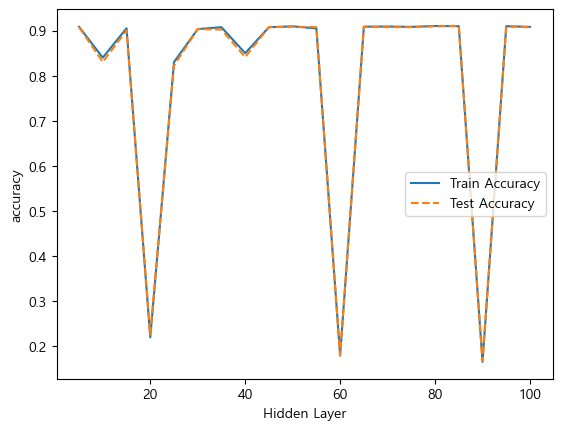

In [8]:
#모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()


## Activation : 활성화 함수에 따른 모델 성능

In [9]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_function = ["logistic", "tanh", "relu"]

for v_fuction in para_function:
    #은닉층 2개
    nn = MLPClassifier(activation=v_fuction, random_state =1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
   
#데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation Function"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_function.round(3)

,Activation Function,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.722,0.683


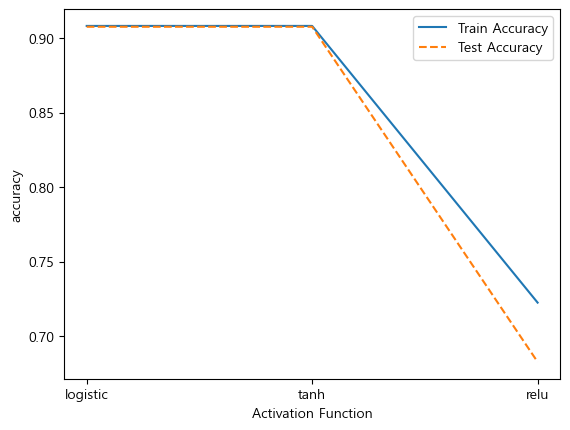

In [10]:
#모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_function, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()


- scale 미적용 데이터 기준으로 "relu" 함수 적용 시 정확도가 매우 낮음

## Standardscaler 변환

In [11]:
v_feature_name = df_train_x.columns
scaler=StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [12]:
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size=0.3,random_state=1234)
print('train data X size : {}'.format(df_scaled_train_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (2623, 18)
test data X size : (1125, 18)


In [13]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set: 0.971
Accuracy on test set: 0.943


## Hidden Layer : 은닉층,뉴런 변경에 따른 모델 성능

In [14]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_hidden = [ 5 * hidden for hidden in range(1,21)]
for v_hidden in para_hidden:
    #은닉층 2개
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
   
#데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.932,0.924
1,10,0.944,0.935
2,15,0.962,0.931
3,20,0.975,0.948
4,25,0.978,0.940
5,30,0.987,0.948
6,35,0.990,0.950
7,40,0.994,0.952
8,45,0.992,0.948
9,50,0.998,0.955


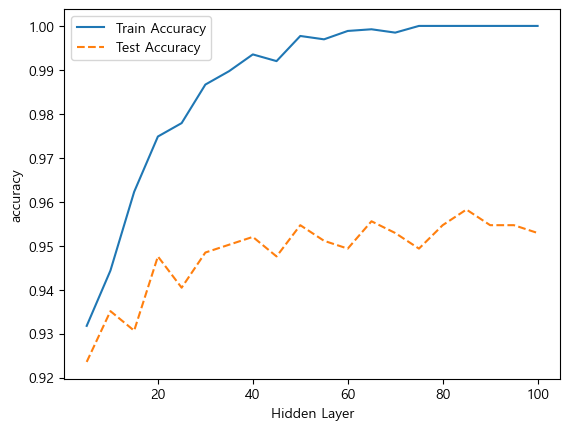

In [15]:
#모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()


In [16]:
# 활성화 함수는 입력값에 대해 비선형 변환을 수행하여 신경망의 비선형성을 증가시킴
# >> 복잡한 패턴 학습가능하게 만듦, 다중 클래스, 특징 구분하는데 유리함  

## Activation : 활성화 함수에 따른 모델 성능

In [17]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

# relu 가 많이 사용됨
para_function = ["logistic", "tanh", "relu"]

for v_fuction in para_function:
    #은닉층 2개
    nn = MLPClassifier(activation=v_fuction, hidden_layer_sizes = (80,80), random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
   
#데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation Function"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_function.round(3)

,Activation Function,TrainAccuracy,TestAccuracy
0,logistic,0.937,0.933
1,tanh,0.999,0.952
2,relu,1.000,0.955


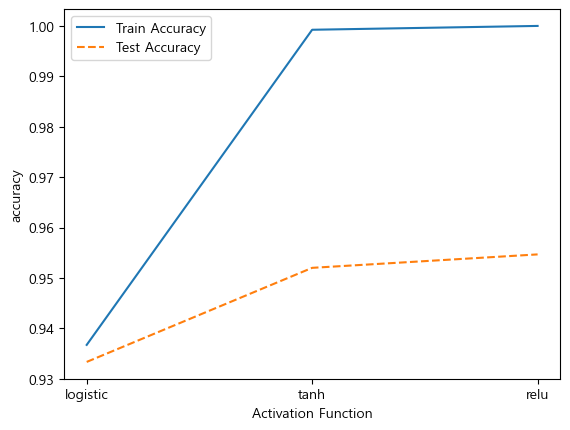

In [18]:
#모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_function, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()


## Solver : 가중치 최적화 변경에 따른 모델 성능

In [19]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_solver = ["lbfgs","sgd","adam"]

for v_solver in para_solver:
    #은닉층 2개
    nn = MLPClassifier(solver = v_solver,activation="relu", hidden_layer_sizes = (80,80), random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
   
#데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Activation Function"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_solver.round(3)

,Activation Function,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.948
1,sgd,0.934,0.928
2,adam,1.000,0.955


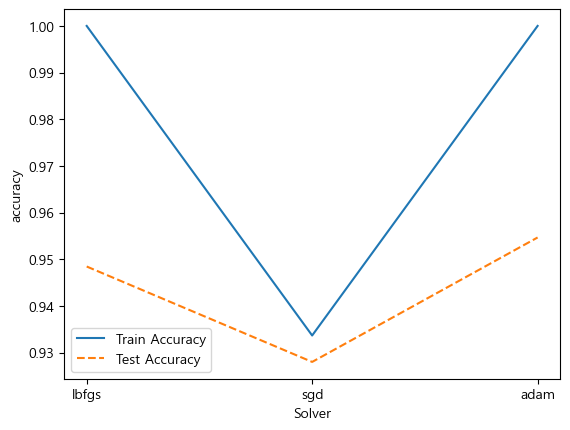

In [20]:
#모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_solver, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()


## Mini Batch : 가중치 최적화 변경에 따른 모델 성능

In [21]:
#train, test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]

para_batch = [20 * batch for batch in range(1,10)]

for v_batch in para_batch:
    #은닉층 2개
    nn = MLPClassifier(solver = "adam",batch_size=v_batch,activation="relu", hidden_layer_sizes = (80,80), random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
   
#데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

#모델 정확도 확인
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


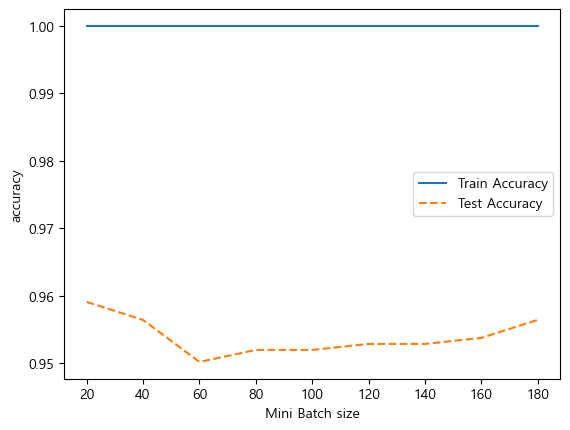

In [22]:
#모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_batch, test_accuracy,linestyle='--',label = 'Test Accuracy')
plt.ylabel("accuracy"); plt.xlabel("Mini Batch size")
plt.legend()


- train 모델은 과적합 경향, test 데이터는 미니 배치 크기가 증가할수록 오차 증가 경향이 있어 지정하지 않음

In [23]:
nn_final=MLPClassifier(hidden_layer_sizes=(80,80),activation="relu",solver="adam",random_state=1234)
nn_final.fit(df_scaled_train_x,df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {:.3f}'.format(nn_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on test set : {:.3f}'.format(nn_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix :\n'.format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set : 1.000
Accuracy on test set : 0.955
Confusion matrix :

              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125

